#Classifying Birds by Sound
This is a google colab notebook. Download the audio samples and upload them to your Google Drive (make sure the audios and the notebook are in the folder/location). You may need to edit the file paths.

In [2]:
# Library imports
from google.colab import drive
drive.mount('/content/drive')

import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

audio_path = "/content/drive/My Drive/Colab Notebooks/quetzal-bird-sound.mp3"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<class 'numpy.ndarray'> <class 'int'>
(261504,) 22050


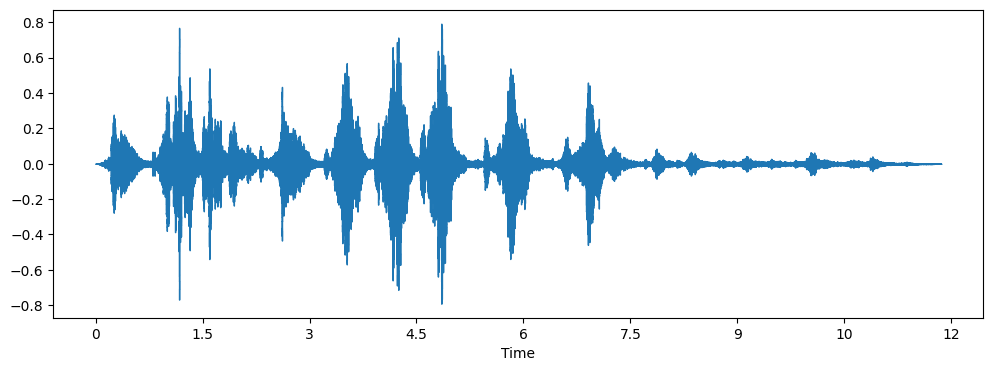

In [4]:
# Visualize waveforms. Note to self: librosa.load returns the audio time series and the sampling rate
time_series, sample_rate = librosa.load(audio_path)

# Print the deets
print(type(time_series), type(sample_rate))
print(time_series.shape, sample_rate)

# Plot the waveform
plt.figure(figsize=(12, 4))
librosa.display.waveshow(time_series, sr=sample_rate)

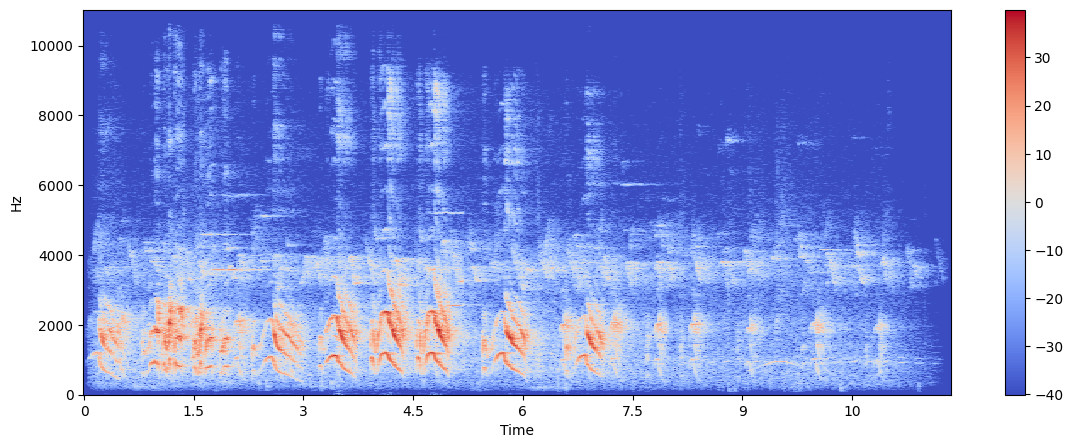

In [6]:
# Convert waveform to spectogram
X = librosa.stft(time_series) # Note to self: STFT stands for Short-time Fourier transform
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14,5))

librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
plt.colorbar()

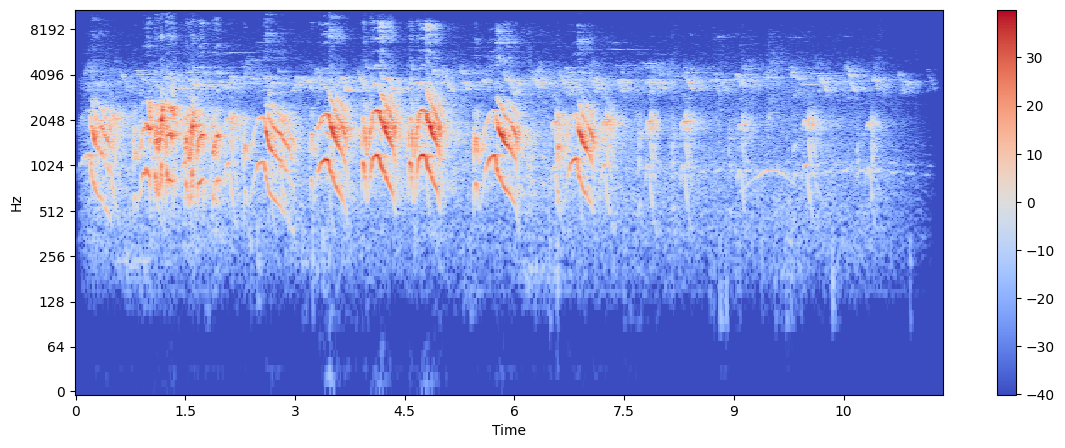

In [7]:
# Apply log transformation (makes data easier to read)
plt.figure(figsize=(14,5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='log')
plt.colorbar()

In [24]:
def audio_to_time_series(audio_path):
  time_series, sample_rate = librosa.load(audio_path)
  X = librosa.stft(time_series)
  Xdb = librosa.amplitude_to_db(abs(X))
  return Xdb, time_series, sample_rate

def visualize_waveform(time_series, sample_rate, audio):
  plt.figure(figsize=(12, 4))
  librosa.display.waveshow(time_series, sr=sample_rate)
  title = "Waveform of " + audio

  plt.title(title)
  plt.xlabel("Time (s)")
  plt.ylabel("Amplitude")

def visualize_spectrogram(Xdb):
  plt.figure(figsize=(14,5))
  librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')
  title = "Waveform of " + audio

  plt.title(title)
  plt.colorbar()

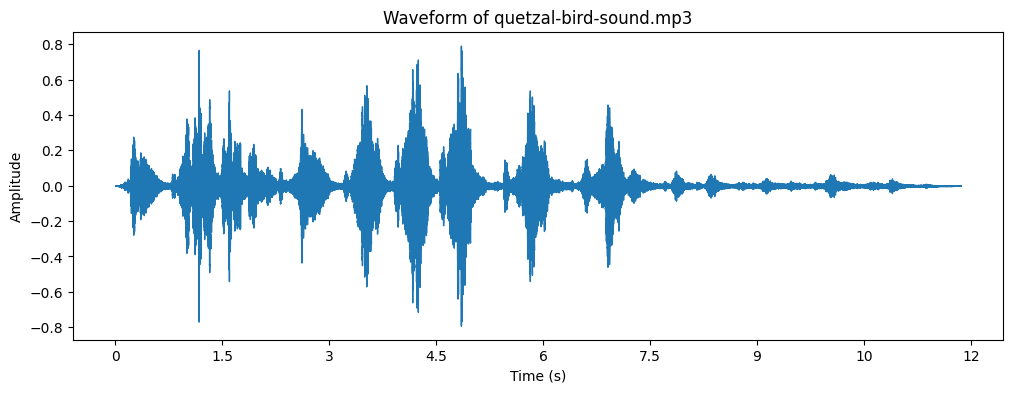

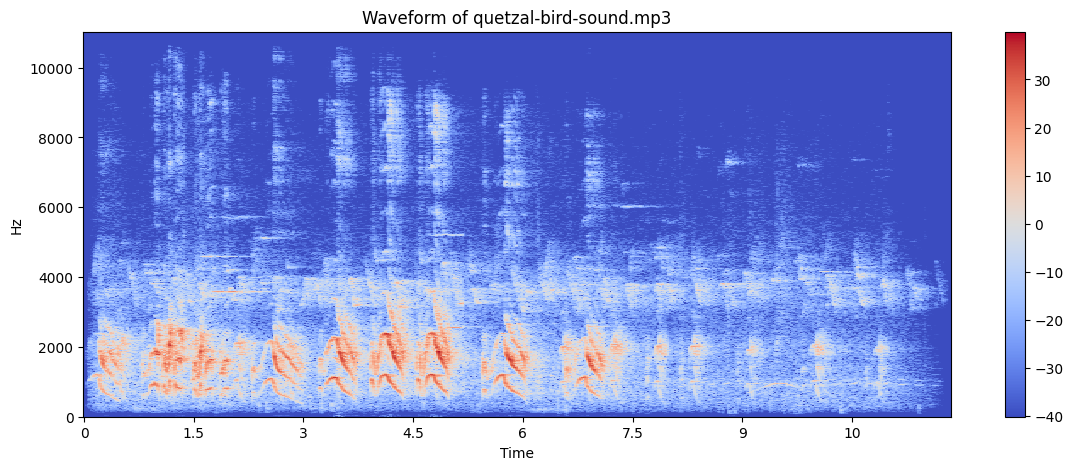

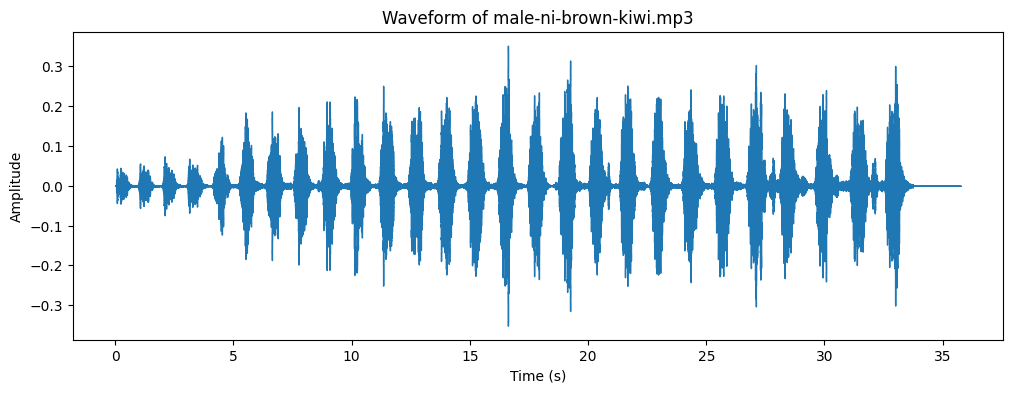

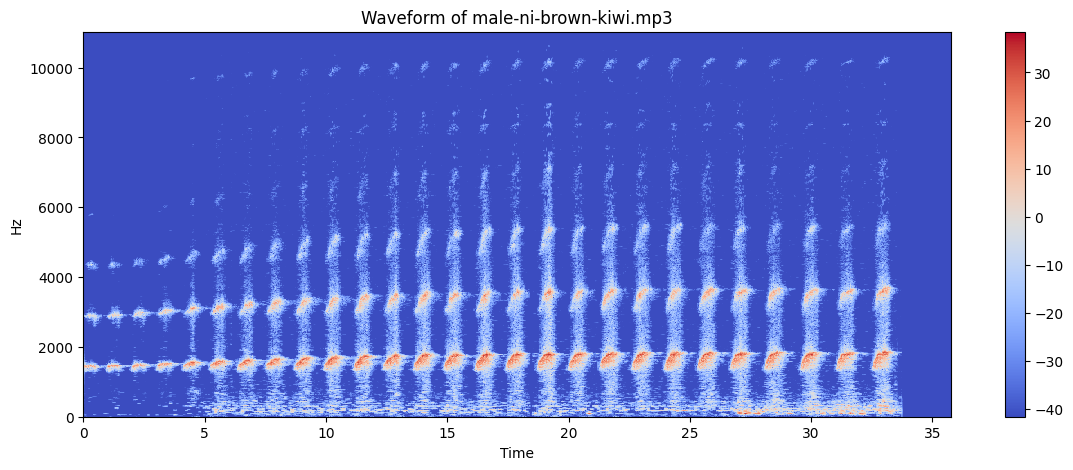

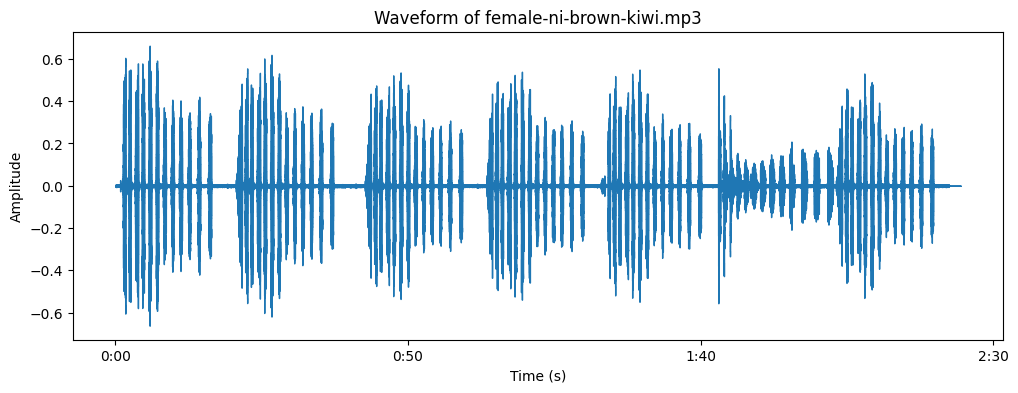

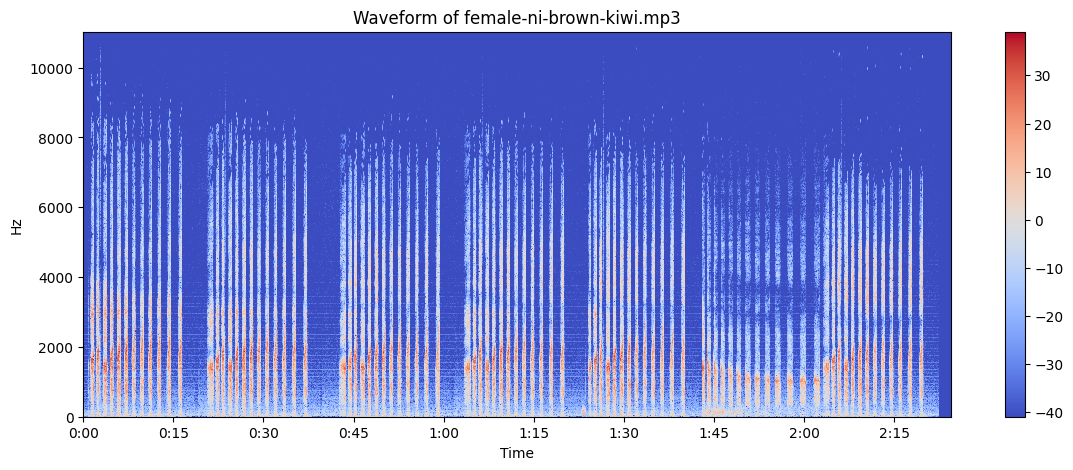

In [25]:
drive_path = "/content/drive/My Drive/Colab Notebooks/"
audios = ["quetzal-bird-sound.mp3", "male-ni-brown-kiwi.mp3", "female-ni-brown-kiwi.mp3"]

for audio in audios:
  audio_path = drive_path + audio
  Xdb, time_series, sample_rate = audio_to_time_series(audio_path)
  visualize_waveform(time_series, sample_rate, audio)
  visualize_spectrogram(Xdb)